In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [3]:
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)


11490434/11490434 [==============================] - 1s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [4]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [5]:
plt.figure(figsize=[5,5])

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

Text(0.5, 1.0, 'Ground Truth : 5')

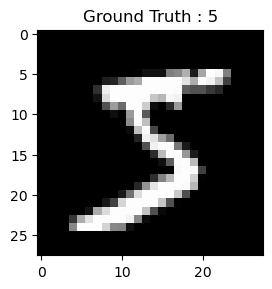

In [6]:
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

Text(0.5, 1.0, 'Ground Truth : 7')

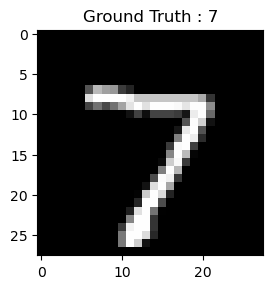

In [7]:
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [8]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [10]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [11]:
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, 
train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [13]:
batch_size = 64
epochs = 3
num_classes = 10
m_model = Sequential()
m_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
m_model.add(LeakyReLU(alpha=0.1))
m_model.add(MaxPooling2D((2, 2),padding='same'))

In [14]:
m_model.add(Flatten())
m_model.add(Dense(128, activation='linear'))
m_model.add(LeakyReLU(alpha=0.1)) 
m_model.add(Dense(num_classes, activation='softmax'))
m_model.compile(loss=keras.losses.categorical_crossentropy, 
optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
m_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                        

In [15]:
m_train = m_model.fit(train_X, train_label, 
batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, 
valid_label))

Epoch 1/3
750/750 [==============================] - 14s 18ms/step - loss: 0.1910 - accuracy: 0.9440 - val_loss: 0.0874 - val_accuracy: 0.9743
Epoch 2/3
750/750 [==============================] - 13s 18ms/step - loss: 0.0636 - accuracy: 0.9807 - val_loss: 0.0712 - val_accuracy: 0.9771
Epoch 3/3
750/750 [==============================] - 14s 19ms/step - loss: 0.0426 - accuracy: 0.9871 - val_loss: 0.0570 - val_accuracy: 0.9826


In [16]:
test_eval = m_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.04810214415192604
Test accuracy: 0.9839000105857849


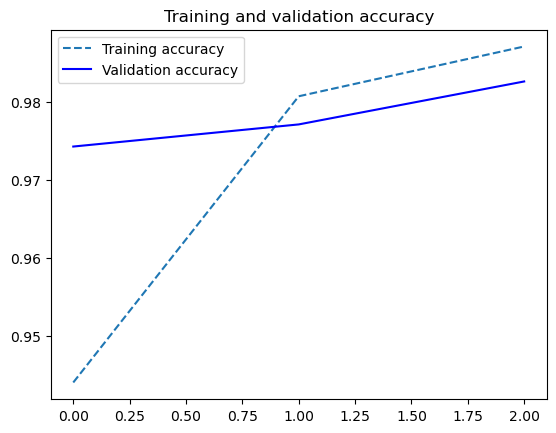

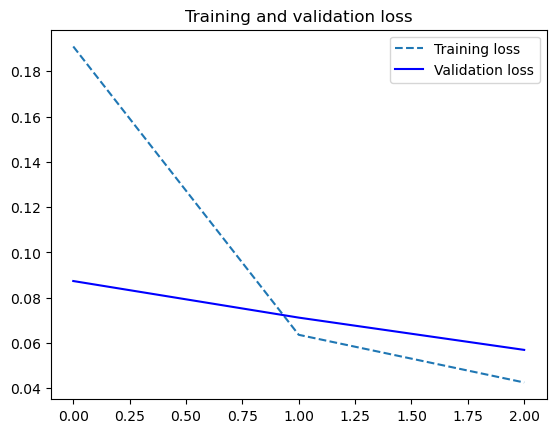

In [17]:
accuracy = m_train.history['accuracy']
val_accuracy = m_train.history['val_accuracy']
loss = m_train.history['loss']
val_loss = m_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '--', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
epochs=1

In [18]:
m_model = Sequential()
m_model.add(Conv2D(32, kernel_size=(3, 
3),activation='linear',padding='same',input_shape=(28,28,1)))
m_model.add(LeakyReLU(alpha=0.1))
m_model.add(MaxPooling2D((2, 2),padding='same'))
m_model.add(Dropout(0.25))
m_model.add(Flatten())
m_model.add(Dense(128, activation='linear'))
m_model.add(LeakyReLU(alpha=0.1)) 
m_model.add(Dropout(0.3))
m_model.add(Dense(num_classes, activation='softmax'))
m_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                      

In [19]:
m_model.compile(loss=keras.losses.categorical_crossentropy, 
optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
m_train_dropout = m_model.fit(train_X, train_label, 
batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, 
valid_label))

750/750 [==============================] - 17s 22ms/step - loss: 0.2480 - accuracy: 0.9256 - val_loss: 0.0921 - val_accuracy: 0.9733


In [20]:
m_model.save("fashion_model_dropout.h5py")
test_eval = m_model.evaluate(test_X, test_Y_one_hot, verbose=1)

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


313/313 [==============================] - 2s 6ms/step - loss: 0.0784 - accuracy: 0.9770


In [21]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.07839234918355942
Test accuracy: 0.9769999980926514


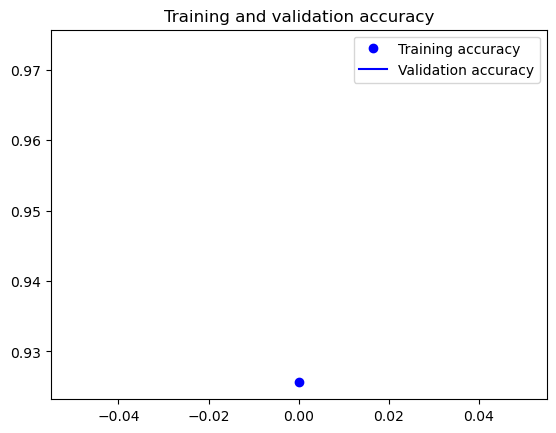

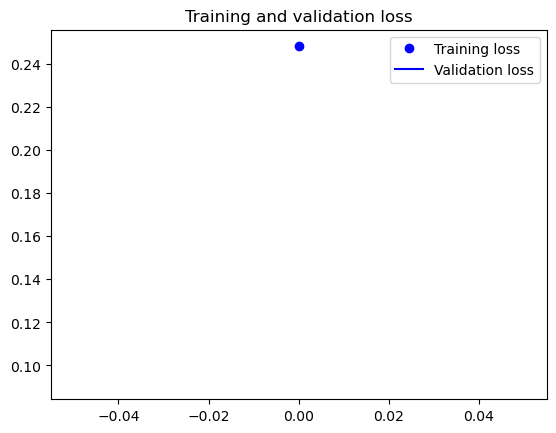

In [22]:
accuracy = m_train_dropout.history['accuracy']
val_accuracy = m_train_dropout.history['val_accuracy']
loss = m_train_dropout.history['loss']
val_loss = m_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
predicted_classes = m_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

313/313 [==============================] - 2s 6ms/step


((10000,), (10000,))

Found 9731 correct labels


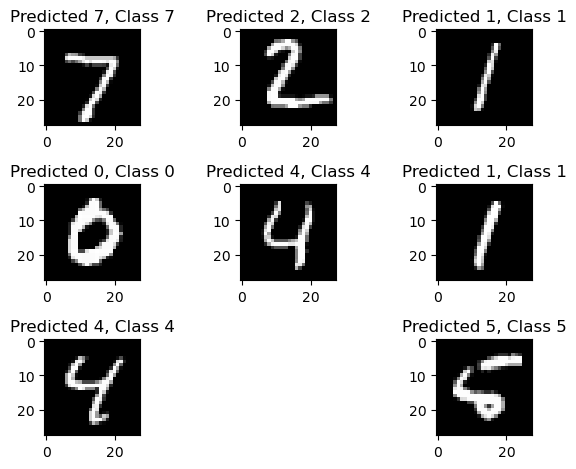

In [24]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
 plt.subplot(3,3,i+1)
 plt.imshow(test_X[correct].reshape(28,28), cmap='gray',interpolation='none')
 plt.title("Predicted {}, Class {}".format(predicted_classes[correct],test_Y[correct]))
 plt.tight_layout()

Found 269 incorrect labels


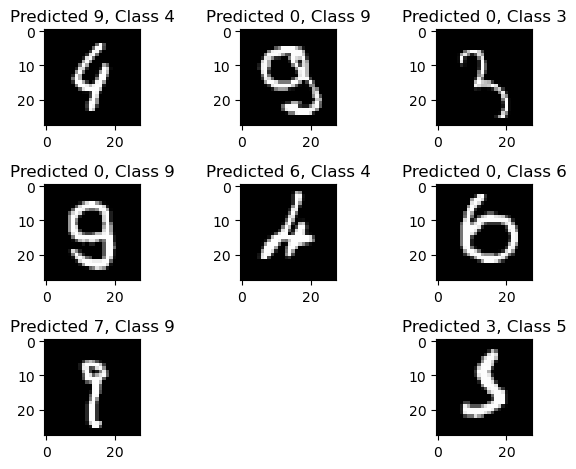

In [25]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
 plt.subplot(3,3,i+1)
 plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', 
interpolation='none')
 plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], 
test_Y[incorrect]))
 plt.tight_layout()

In [26]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, 
target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.90      0.99      0.94       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.96      0.98      0.97      1032
     Class 3       0.98      0.98      0.98      1010
     Class 4       0.99      0.97      0.98       982
     Class 5       0.98      0.98      0.98       892
     Class 6       0.99      0.97      0.98       958
     Class 7       0.98      0.95      0.97      1028
     Class 8       0.98      0.97      0.97       974
     Class 9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

